# Imports 

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score, precision_score, classification_report,
                            confusion_matrix, roc_auc_score)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dados

In [4]:
dados = load_breast_cancer()
X = dados.data
y = dados.target

In [32]:
# Verificar as classes
print(dados.target_names)
print(dados.target[:10])  # Exemplo dos primeiros 10 alvos

# Confirmar a associação de valores com as classes
for target_value, class_name in zip(range(len(dados.target_names)), dados.target_names):
    print(f'{target_value} => {class_name}')

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0]
0 => malignant
1 => benign


In [5]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
# Tamanho dos conjuntos de treino e teste
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))

Tamanho do conjunto de treino: 455
Tamanho do conjunto de teste: 114


In [31]:
# Contar a quantidade de 0s e 1s
unique, counts = np.unique(y_train, return_counts=True)

# Calcular a proporção de cada valor
proportions = counts / len(y_train)
proportions

array([0.37582418, 0.62417582])

# Modelo

In [37]:
# Instanciando o modelo
modelo = XGBClassifier(n_estimators=25,
                      max_depth=3, learning_rate=0.01, 
                      subsample=0.7)

In [38]:
# Treinando o modelo
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Aqui está o que cada parâmetro significa:

- `n_estimators=10`: Define o número de árvores que serão criadas no processo de treinamento. Neste caso, o modelo irá treinar 50 árvores.

- `max_depth=3`: Define a profundidade máxima de cada árvore. Uma profundidade menor geralmente ajuda a evitar o overfitting, pois limita o número de divisões que cada árvore pode fazer.

- `learning_rate=0.01`: Taxa de aprendizado do modelo. Esse valor controla o impacto de cada árvore individual no resultado final. Valores menores tendem a resultar em um modelo mais robusto, mas também pode requerer mais árvores (mais iterações) para atingir uma boa performance.

- `subsample=0.7`: A fração do conjunto de dados que será usada para treinar cada árvore. Um valor de 0.7 significa que, para cada árvore, 70% dos dados de treinamento serão amostrados aleatoriamente e utilizados. Isso pode ajudar a reduzir o overfitting ao introduzir variabilidade no treinamento de cada árvore.

In [39]:
# Predição do modelo
y_pred = modelo.predict(X_test)

## Avaliação do modelo

In [40]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print('Acurácia: {}'.format(acuracia))
print('Precisão: {}'.format(precisao))
print('Recall: {}'.format(recall))
print('AUC: {}'.format(AUC))

Acurácia: 0.8859649122807017
Precisão: 0.8488372093023255
Recall: 1.0
AUC: 0.8414634146341463


**Interpretando os resultados:**

- Acurácia: 0.6404 (64,04%): A acurácia mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo. Neste caso, o modelo acertou aproximadamente 64,04% das previsões. No entanto, a acurácia pode ser enganadora se os dados estiverem desbalanceados (isto é, se uma classe for muito mais frequente que a outra).

- Precisão: 0.6404 (64,04%): A precisão mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Aqui, 64,04% das previsões que o modelo fez como sendo da classe positiva estavam corretas. Isso é importante em cenários onde as consequências de uma previsão positiva incorreta são graves (por exemplo, diagnóstico de uma doença).

- Recall: 1.0 (100%): O recall (ou sensibilidade) mede a proporção de casos positivos que foram corretamente identificados pelo modelo. Um recall de 1.0 significa que o modelo conseguiu identificar corretamente todos os exemplos da classe positiva. Esse valor é o ideal quando é crucial identificar todos os casos positivos, mesmo que isso signifique ter alguns falsos positivos.

- AUC (Área sob a Curva ROC): 0.5 (50%): A AUC mede a habilidade do modelo de distinguir entre classes positivas e negativas. Um valor de 0.5 indica que o modelo não tem nenhuma capacidade discriminativa entre as classes; é equivalente a fazer previsões aleatórias. Valores de AUC próximos de 1.0 indicam excelente capacidade de discriminação, enquanto valores próximos de 0.5 indicam que o modelo não está conseguindo separar as classes.

- Olhando a matriz de confusão.

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)

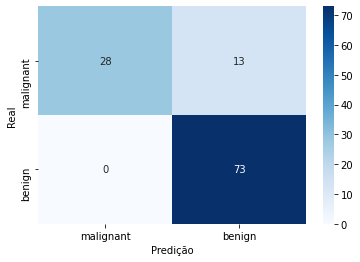

In [42]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
           xticklabels=dados.target_names, 
           yticklabels=dados.target_names)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

In [43]:
VP = 73
FP = 13
FN = 0
VN = 28

recall = VP/(VP + FN)
acuracia = (VP + VN)/(VP + VN + FP + FN)
precisao = VP / (VP + FP)

print(recall)
print(acuracia)
print(precisao)

1.0
0.8859649122807017
0.8488372093023255


# Exercício

> Mude os hiperparâmetros e treine um novo modelo. Aumente o número de estimadores, a profundidade da árvore, por exemplo. 

> Desenhe a curva ROC comparando os dois modelos. Que conclusões podemos extrair? 